In [ ]:
!pip install torchmetrics

***Import needed libraries***

In [ ]:
import torch
from torch.optim import SGD
from torchmetrics import Accuracy
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

***Read the data***

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Proj1_Data.csv")

***Display the charactristics of the data***

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


***Summarize the data***


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


***Data Pre-Processing***

In [ ]:
# Check for missing values
missing_data = df.isnull().sum()
print(missing_data)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
# Drop rows with any missing values
df.dropna(inplace=True)

# fill missing values with the default value 0
df.fillna(value=0, inplace=True)

In [ ]:
newdf = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
newdf.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


***Heat Map***

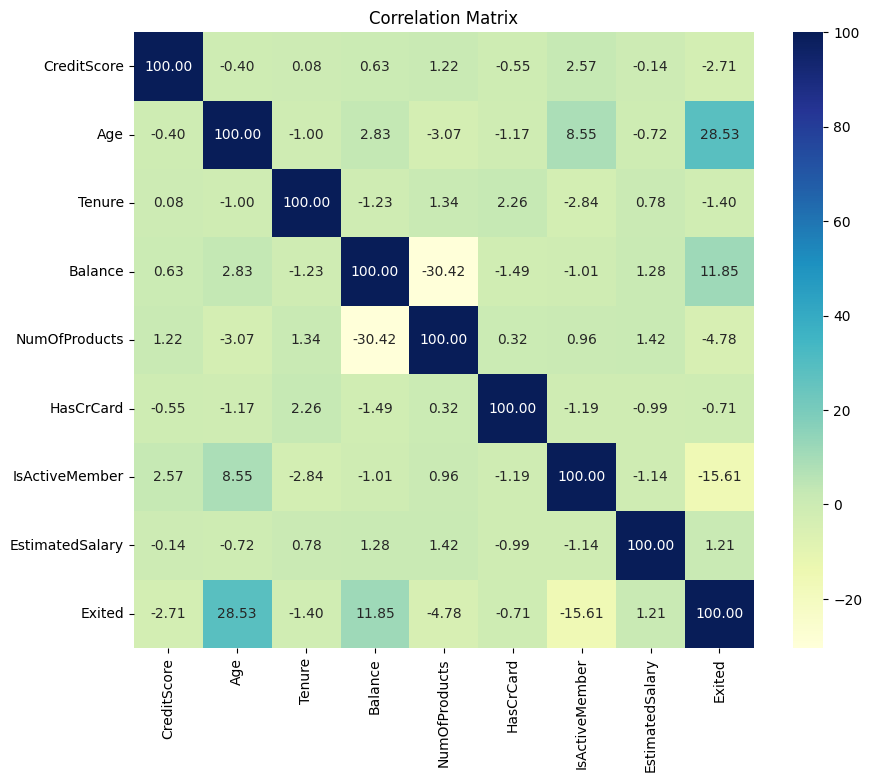

In [ ]:
# Select the columns for correlation calculation
correlation_columns = [
    "CreditScore", "Age", "Tenure", "Balance",
    "NumOfProducts", "HasCrCard", "IsActiveMember",
    "EstimatedSalary", "Exited"
]

# Calculate the correlation matrix
correlation_matrix = df[correlation_columns].corr() * 100

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

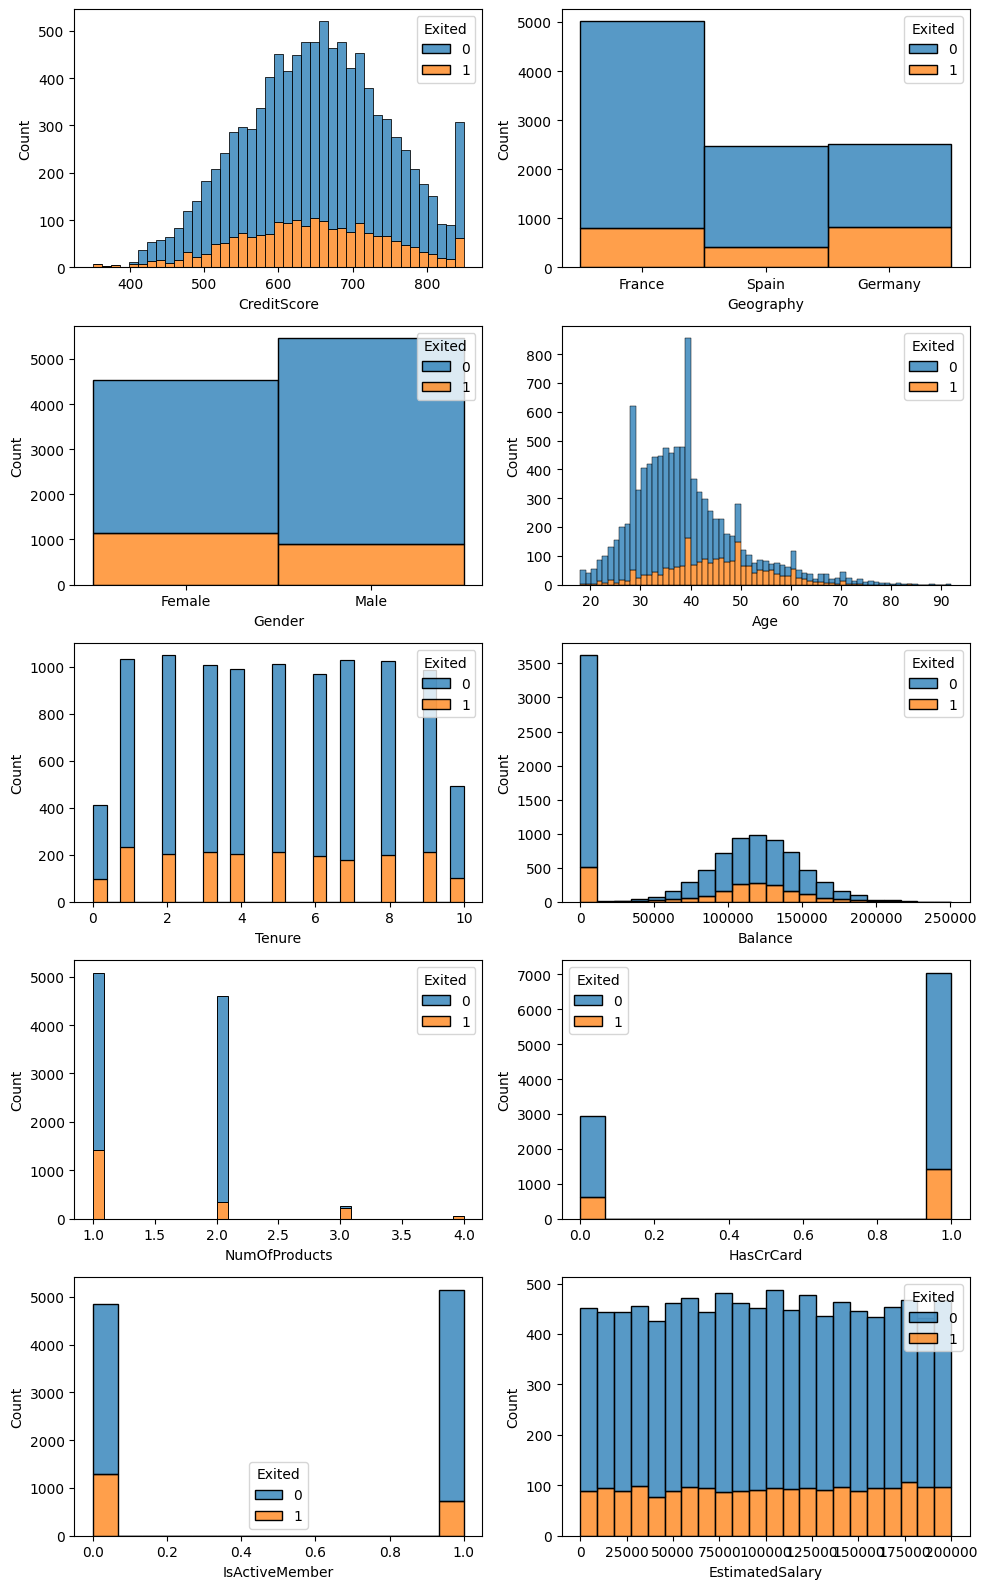

In [ ]:
# Columns to plot
columns = [
    "CreditScore", "Geography", "Gender", "Age", "Tenure",
    "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]


fig, axs = plt.subplots(5, 2, figsize=(10, 16))

# Iterate over columns and plot
for i, column in enumerate(columns):
    row = i // 2  # Calculate the row index
    col = i % 2   # Calculate the column index
    sns.histplot(x=column, hue="Exited", multiple='stack', data=df, ax=axs[row, col])

plt.tight_layout()
plt.show()

In [ ]:
# Converting categorical variables

geo_onehot = pd.get_dummies(newdf['Geography'], dtype=int)
gender_onehot = pd.get_dummies(newdf['Gender'],  dtype=int)

newdf = newdf.drop(['Geography', "Gender"], axis = 1)
newdf = newdf.join(geo_onehot)
newdf = newdf.join(gender_onehot)

newdf.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [ ]:
# Normalize the dataframe

newdf = pd.DataFrame(MinMaxScaler().fit_transform(newdf), columns=newdf.columns)
newdf.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,1.0,0.0,0.0,1.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,0.0,1.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,1.0,0.0,0.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,1.0,0.0,0.0,1.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
# The goal is to predict if a customer hast exited or not, we split the 'exited' column

y = newdf["Exited"]
X = newdf.drop("Exited", axis = 1)

y, X.head()

(0       1.0
 1       0.0
 2       1.0
 3       0.0
 4       0.0
        ... 
 9995    0.0
 9996    0.0
 9997    1.0
 9998    1.0
 9999    0.0
 Name: Exited, Length: 10000, dtype: float64,
    CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
 0        0.538  0.324324     0.2  0.000000       0.000000        1.0   
 1        0.516  0.310811     0.1  0.334031       0.000000        0.0   
 2        0.304  0.324324     0.8  0.636357       0.666667        1.0   
 3        0.698  0.283784     0.1  0.000000       0.333333        0.0   
 4        1.000  0.337838     0.2  0.500246       0.000000        1.0   
 
    IsActiveMember  EstimatedSalary  France  Germany  Spain  Female  Male  
 0             1.0         0.506735     1.0      0.0    0.0     1.0   0.0  
 1             1.0         0.562709     0.0      0.0    1.0     1.0   0.0  
 2             0.0         0.569654     1.0      0.0    0.0     1.0   0.0  
 3             0.0         0.469120     1.0      0.0    0.0     1.0

In [ ]:
# Implementing train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

print(f'Length X_train:{len(X_train)}, Length y_train:{len(y_train)}و Length X_test:{len(X_test)}, Length y_test:{len(y_test)}')

Length X_train:8000, Length y_train:8000و Length X_test:2000, Length y_test:2000


***Converting Df's data to Tensors***

In [ ]:
X_test = torch.from_numpy(X_test.values).type(torch.float)
y_test = torch.from_numpy(y_test.values).type(torch.float)

X_train = torch.from_numpy(X_train.values).type(torch.float)
y_train = torch.from_numpy(y_train.values).type(torch.float)

y_val = torch.from_numpy(y_val.values).type(torch.float)
X_val = torch.from_numpy(X_val.values).type(torch.float)

***Model***

In [ ]:
# Model definition
model = torch.nn.Sequential(
    torch.nn.Linear(13, 39),
    torch.nn.BatchNorm1d(39),  # Batch Normalization
    torch.nn.ReLU(),
    torch.nn.Dropout(0.2),  # Dropout layer with 20% dropout rate
    torch.nn.Linear(39, 78),
    torch.nn.BatchNorm1d(78),  # Batch Normalization
    torch.nn.ReLU(),
    torch.nn.Linear(78, 1)
)


# Lists that store train_loss and val_loss
train_losses = []
val_losses = []

# Loss function
loss_fn = torch.nn.BCEWithLogitsLoss()

# Optimizer                         # Learning rate   # L2 regularization
optimizer = SGD(model.parameters(), lr=0.02, weight_decay=0.01)

# Accuracy metric
accuracy = Accuracy(task='BINARY')  # Specify the task as 'BINARY'

# Number of epochs
epochs = 10000

# Training and evaluation loop
for epoch in range(epochs+1):
    # Training
    model.train()

    # Optimizer zero grad
    optimizer.zero_grad()

    # Forward pass
    y_logits = model(X_train)

    # Calculate loss/accuracy
    loss = loss_fn(y_logits.squeeze(), y_train)

    # Backpropagation
    loss.backward()

    # Optimizer step
    optimizer.step()


    # Validation & Testing
    model.eval()
    with torch.no_grad():
        val_logits = model(X_val)
        val_loss = loss_fn(val_logits.squeeze(), y_val)

        # Append the training and validation loss to the lists
        train_losses.append(loss.item())
        val_losses.append(val_loss.item())

        test_logits = model(X_test)
        test_loss = loss_fn(test_logits.squeeze(), y_test)


    # Compute accuracy
    train_acc = accuracy(torch.round(torch.relu(y_logits)).squeeze(), y_train)
    test_acc = accuracy(torch.round(torch.relu(test_logits)).squeeze(), y_test)
    val_acc = accuracy(torch.round(torch.relu(val_logits)).squeeze(), y_val)


    # Print out what's happening every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Training Acc: {train_acc*100:.2f}% | Validation loss: {val_loss:.5f}, Validation Acc: {val_acc*100:.2f}% | Test accuracy: {test_acc*100:.2f}%")

Epoch: 0 | Loss: 0.78208 | Training Acc: 65.79% | Validation loss: 0.73262, Validation Acc: 79.40% | Test accuracy: 80.00%
Epoch: 100 | Loss: 0.48383 | Training Acc: 79.69% | Validation loss: 0.48864, Validation Acc: 79.40% | Test accuracy: 80.00%
Epoch: 200 | Loss: 0.47332 | Training Acc: 79.69% | Validation loss: 0.47857, Validation Acc: 79.40% | Test accuracy: 80.00%
Epoch: 300 | Loss: 0.46633 | Training Acc: 79.69% | Validation loss: 0.47177, Validation Acc: 79.40% | Test accuracy: 80.00%
Epoch: 400 | Loss: 0.45918 | Training Acc: 79.69% | Validation loss: 0.46520, Validation Acc: 79.40% | Test accuracy: 80.00%
Epoch: 500 | Loss: 0.45290 | Training Acc: 79.79% | Validation loss: 0.45815, Validation Acc: 79.45% | Test accuracy: 80.05%
Epoch: 600 | Loss: 0.44332 | Training Acc: 80.11% | Validation loss: 0.45044, Validation Acc: 79.70% | Test accuracy: 80.10%
Epoch: 700 | Loss: 0.43515 | Training Acc: 80.36% | Validation loss: 0.44192, Validation Acc: 80.35% | Test accuracy: 80.55%
Ep

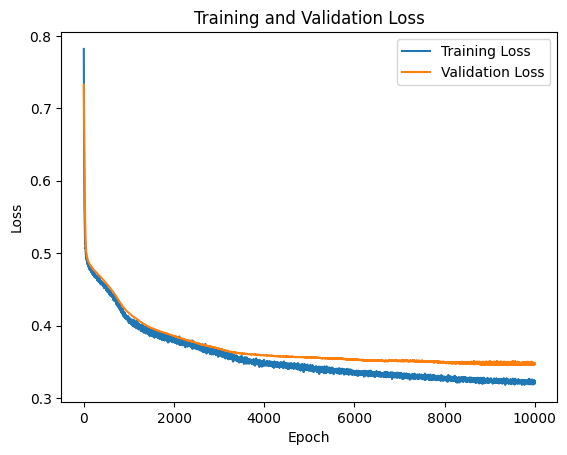

In [ ]:
# Plotting the loss
plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

***As we can see, there is little to no overfitting in the model***